### Skin Detection Model 

This notebook file shows the code that makes up our skin detection model. The model detects skin in real time before the image is taken. This is important so that people don't upload photos of non-skin to the malignancy model and achieve inaccurate results. This model does not detect melanoma. 

## Basic Setup

Here we explain the basic methodology of how this model was made using steps. This is by no means an all-inclusive representation, just an overview. 

### Steps

1. Import libraries

1. Import dataset and define rows and columns. Dataset used can be found at: https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation
  > Note: Here we are specifying the purpose of RGB compared to the purpose of the classification (skin or not skin).
1. Define X and Y. What we are training and testing on. Print these to make sure they are correctly defined. 

1. Encode the Y so that the computer can read its values. 

1. Split into training and testing, begin data preprocessing. 

1. Data preprocessing. Start by feature scaling and looking for missing values. 

1. Use random forest classifier to train model.

1. Analyze accuracy with a confusion matrix. 

1. Style confusion matrix according to heatmap for visualized accuracy. 

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

import tensorflow as tf
import datetime 

In [ ]:
cols = ['R', 'G', 'B', 'Decision']
df = pd.read_csv('https://raw.githubusercontent.com/vidushimeel/skinornot/main/Skin_NonSkin%20-%20Skin_NonSkin.csv', names=cols)
df.head()

,R,G,B,Decision
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [ ]:
x = df.iloc[:, 0:3]
y = df.iloc[:, 3]

In [ ]:
x.head() #what we are training model on

,R,G,B
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


In [ ]:
y.head() #what we are trying to predict (vars)

0    1
1    1
2    1
3    1
4    1
Name: Decision, dtype: int64

In [ ]:
#find missing or null data points 
df.isnull().sum()
df.isna().sum()

R           0
G           0
B           0
Decision    0
dtype: int64

In [ ]:
#encode the Y, which is categorical 
#convert M/B to 1 and 0 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y) #dont need to cast as num py array bc dependent variabel does not have to be numpy array 
print (y)

[0 0 0 ... 1 1 1]


In [ ]:
#split into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

In [ ]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #the formula 
#only apply feature scaling to numerical values, leave dummy variables alone 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 5094     0]
 [   12 19400]]


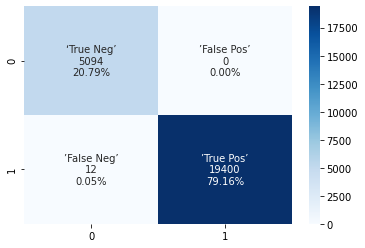

In [ ]:
group_names = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
#5094 true pos. 
#0 false pos. 
#12 false neg.
#19400 true neg. 
#total tests = 24,506
#to get accuracy rate, do 100-(12/24,506) = 99.9996% inaccurate